# Power Analysis

Goal is to qualitatively compare the power of different hypothesis test approaches on binary data.

# 1 Comparing difference in mean estimates

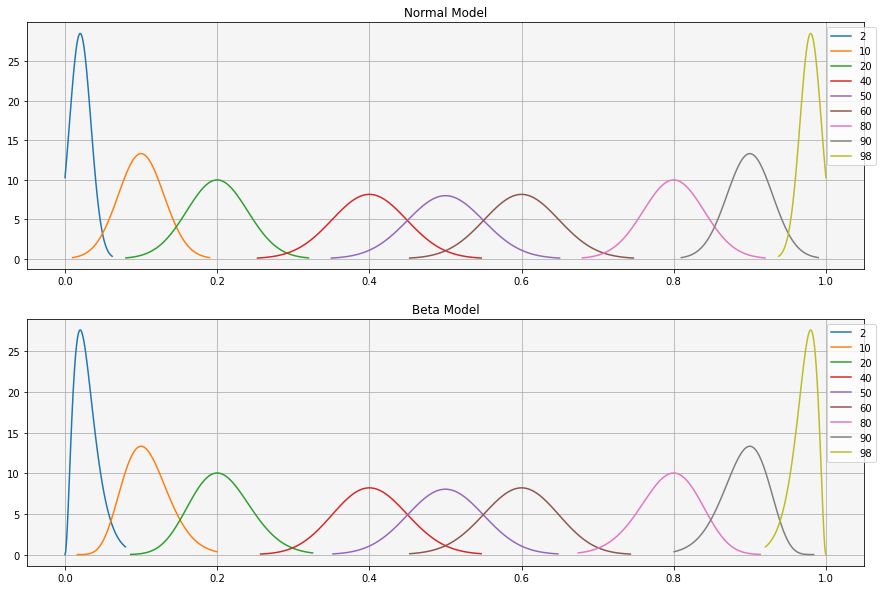

In [1]:
from scipy.stats import norm, beta
import numpy as np
import matplotlib.pyplot as plt

def get_sample_mean_dist(dist, n, s):
    if dist == "norm":
        p = s / n
        sigma = np.sqrt(p * (1 - p))
        smd = norm(loc=s/n, scale=sigma / np.sqrt(n))
        
    if dist == "beta":
        smd = beta(1 + s, 1 + (n - s))
        
    return smd

def plot_dist(dist, ax=None, label=""):
    if not ax:
        fig, ax = plt.subplots()
    
    mu = dist.mean()
    sd = dist.std()
    lower = max(mu - 3 * sd, 0)
    upper = min(1, mu + 3 * sd)
    x = np.linspace(lower, upper, 100)
    
    ax.plot(x, dist.pdf(x), label=label)
    ax.set_facecolor("whitesmoke")
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.02, 1))
    
    if ax:
        return ax
    else:
        plot.show()
        

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

for s in [2, 10, 20, 40, 50, 60, 80, 90, 98]:
    plot_dist(get_sample_mean_dist("norm", 100, s), ax=ax[0], label=str(s))
    ax[0].set_title("Normal Model")
    plot_dist(get_sample_mean_dist("beta", 100, s), ax=ax[1], label=str(s))
    ax[1].set_title("Beta Model")

plt.show()

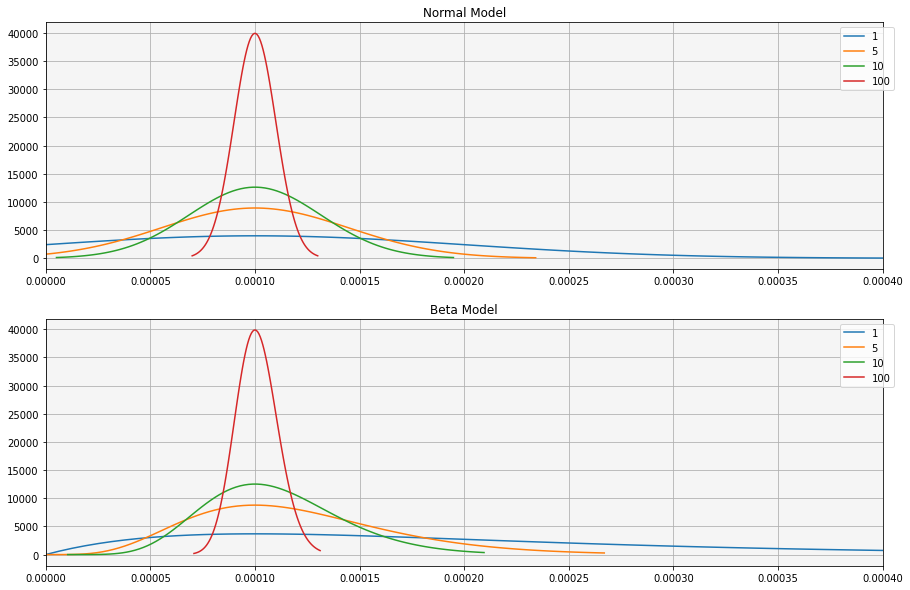

In [2]:
# modelling very low baseline rate and different sample sizes

p = 0.0001

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

for samples in [10000, 50000, 100000, 1000000]:
    success = p * samples
    plot_dist(get_sample_mean_dist("norm", samples, success), ax=ax[0], label=str(int(success)))
    ax[0].set_title("Normal Model")
    plot_dist(get_sample_mean_dist("beta", samples, success), ax=ax[1], label=str(int(success)))
    ax[1].set_title("Beta Model")
    for a in ax:
        a.set_xlim(0, 0.0004)

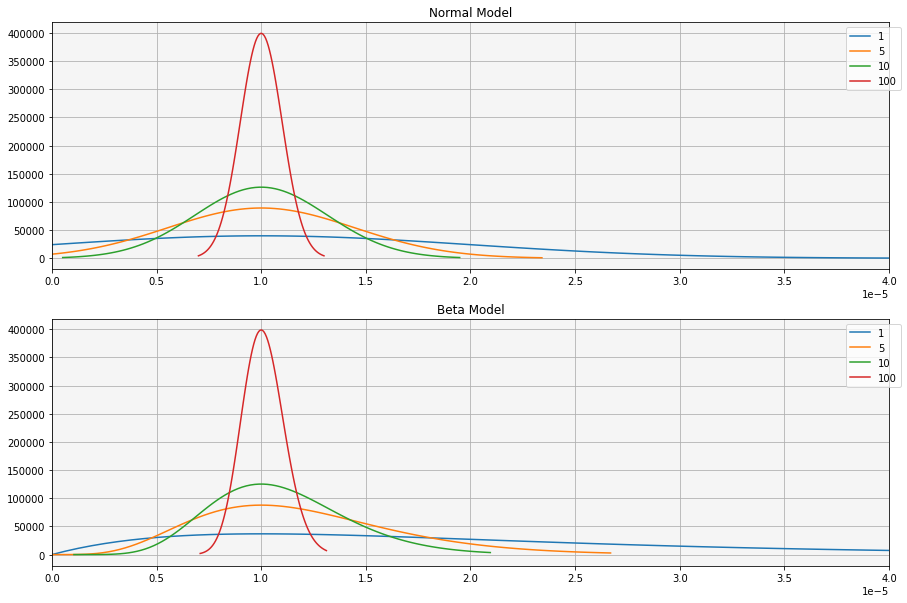

In [3]:
# modelling very low baseline rate and different sample sizes

p = 0.00001

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

for samples in [100000, 500000, 1000000, 10000000]:
    success = p * samples
    plot_dist(get_sample_mean_dist("norm", samples, success), ax=ax[0], label=str(int(success)))
    ax[0].set_title("Normal Model")
    plot_dist(get_sample_mean_dist("beta", samples, success), ax=ax[1], label=str(int(success)))
    ax[1].set_title("Beta Model")
    for a in ax:
        a.set_xlim(0, 0.00004)

Above examples illustrate: Beta or normal model yield almost the same results after we have about 100 samples in each category.

# 2 Power Analysis

In [16]:
from statsmodels.stats.power import tt_ind_solve_power

ratio=1
power=.8
alpha=0.05

mean1=.01
mean2=.011
sd1 = np.sqrt(mean1 * (1 - mean1))
sd2 = np.sqrt(mean2 * (1 - mean2))
sd = .5 * (sd1 + sd2)

effect_size=(mean2 - mean1) / sd

tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=ratio,
)

163001.87692145075